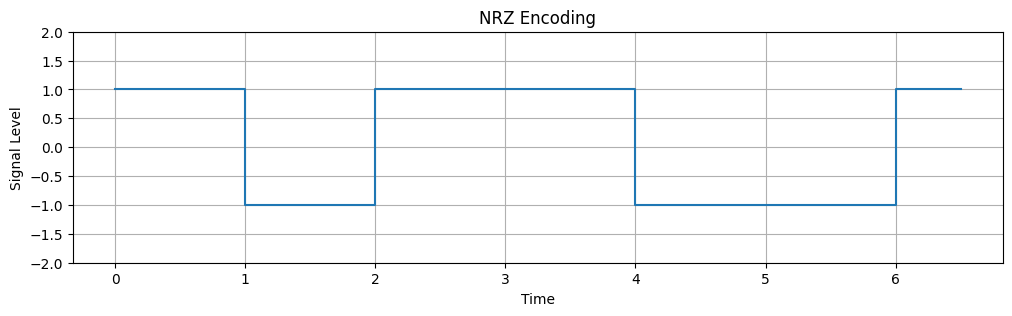

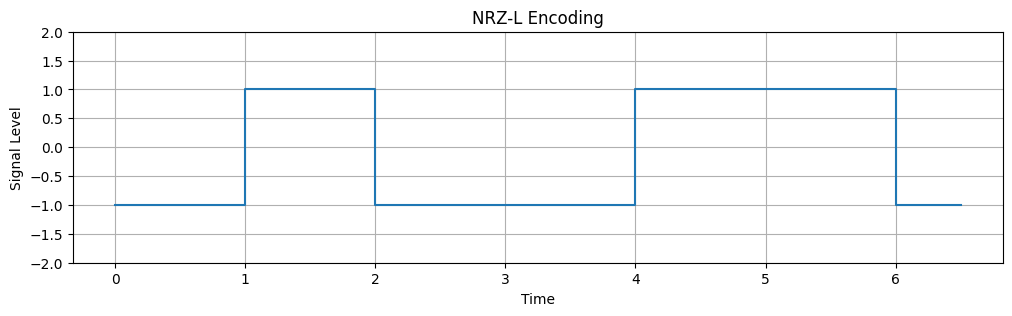

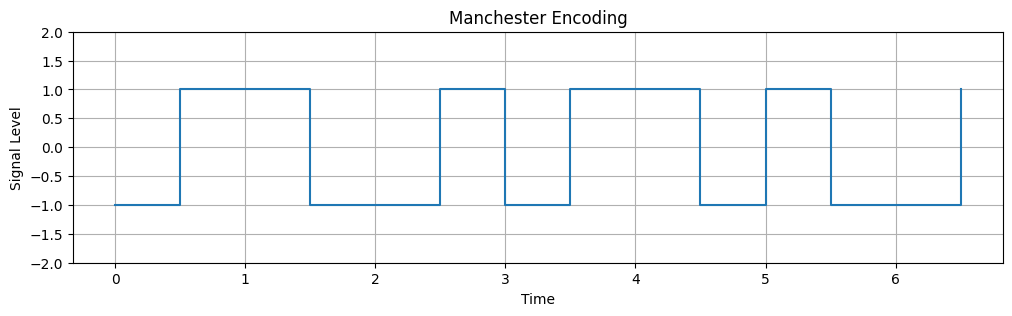

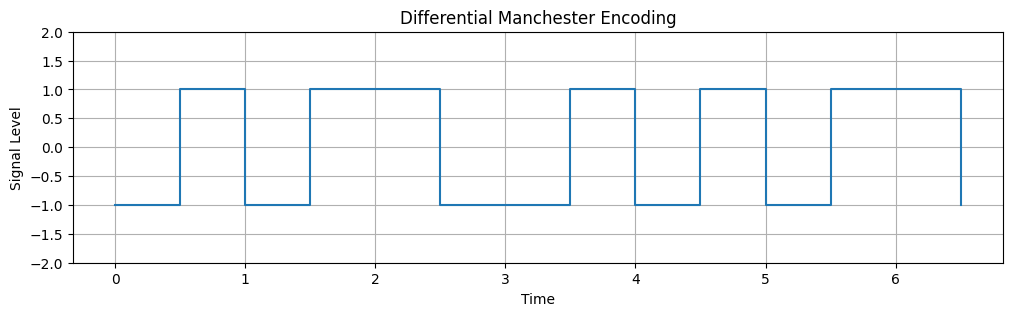

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plot_signal(time, signal, title):
    """
    Plots the digital waveform.
    """
    plt.figure(figsize=(12, 3))
    plt.step(time, signal, where='post')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Signal Level')
    plt.grid(True)
    plt.ylim(-2, 2)
    plt.show()


def nrz(data):
    """
    Non-Return-to-Zero encoding:
    High level for 1, Low level for 0.
    """
    signal = []
    time = []
    for bit in data:
        signal.extend([1 if bit else -1, 1 if bit else -1])
        time.extend([len(time)/2, len(time)/2 + 0.5])
    return time, signal


def nrz_l(data):
    """
    Non-Return-to-Zero-Level:
    Positive voltage for 1, Negative voltage for 0.
    """
    signal = []
    time = []
    for bit in data:
        signal.extend([-1 if bit else 1, -1 if bit else 1])
        time.extend([len(time)/2, len(time)/2 + 0.5])
    return time, signal


def manchester(data):
    """
    Manchester Encoding:
    Each bit has a transition in the middle.
    High-to-Low for 1, Low-to-High for 0.
    """
    signal = []
    time = []
    for bit in data:
        if bit == 1:
            signal.extend([-1, 1])  # High-to-Low for 1
        else:
            signal.extend([1, -1])  # Low-to-High for 0
        time.extend([len(time)/2, len(time)/2 + 0.5])
    return time, signal


def differential_manchester(data):
    """
    Differential Manchester Encoding:
    Each bit has a transition in the middle.
    Transition at start of a 0, no transition at start of a 1.
    """
    signal = []
    time = []
    for bit in data:
        last_level = -1 if len(signal) == 0 else signal[len(signal) - 1]
        if bit == 1:
            signal.extend([last_level, -last_level])  # No initial transition
        else:
            # last_level = -last_level  # Initial transition
            signal.extend([-last_level, last_level])
        time.extend([len(time)/2, len(time)/2 + 0.5])
    return time, signal



# Input binary data
binary_data = [1, 0, 1, 1, 0, 0, 1]

# Generate and plot signals for each encoding technique
for encoding, func in [("NRZ", nrz), ("NRZ-L", nrz_l), ("Manchester", manchester), ("Differential Manchester", differential_manchester)]:
    time, signal = func(binary_data)
    plot_signal(time, signal, f"{encoding} Encoding")
